In [2]:
import os
import json

import numpy as np
from matplotlib import pyplot as plt

In [1]:
method = "separate"
cam_nums = [16, 32, 48, 64, 80, 128, 160]
output_path = "../../../output"

In [3]:
def load_result(method, cam_num, output_path, scene, bg):
	if bg == "white":
		bg_string = "_white"
	else:
		bg_string = ""

	path = os.path.join(output_path, f"{method}_{cam_num}{bg_string}", "results", scene, "results.json")

	with open(path, "r") as f:
		data = json.load(f)["ours_30000"]
		return data
	
def plot_metric(metric, method, cam_nums, output_path, scenes, bgs):
	fig = plt.figure(figsize=(8, 4))

	for scene in scenes:
		for bg in bgs:
			results = []
			for cam_num in cam_nums:
				data = load_result(method, cam_num, output_path, scene, bg)
				results.append(data[metric])
			results = np.array(results)

			plt.plot(cam_nums, results, label=f"{scene} ({bg})")
	
	plt.xlabel("Number of Cameras")
	plt.ylabel(metric)
	plt.legend()
	
	return fig

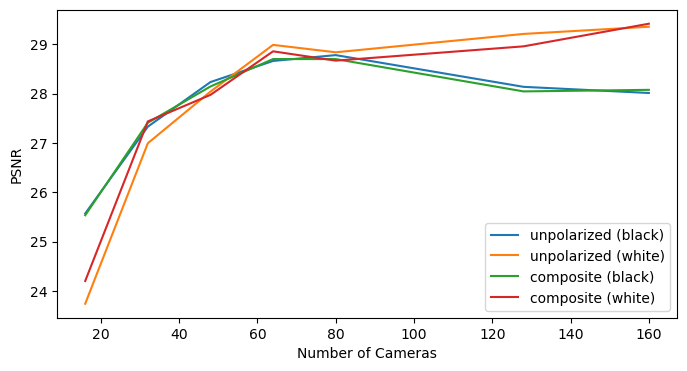

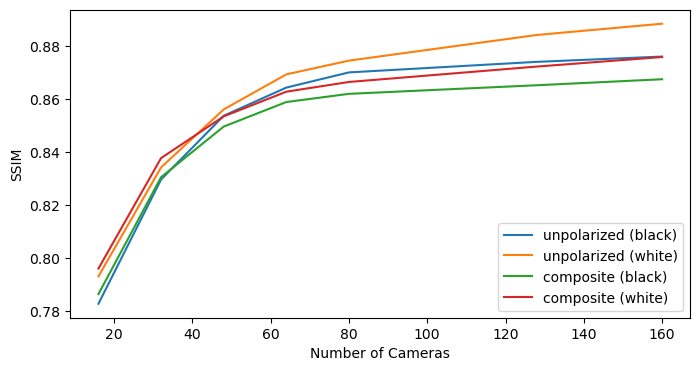

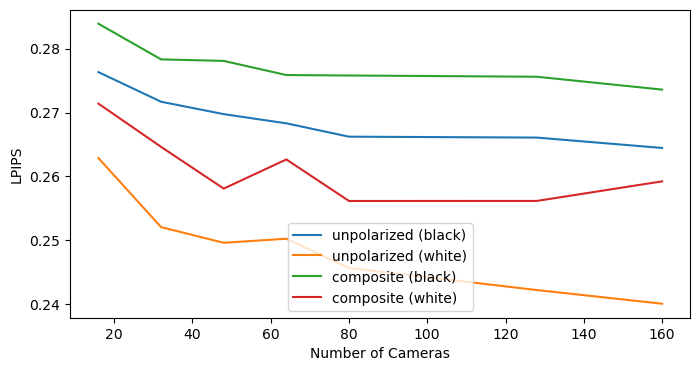

In [4]:
scenes = ["unpolarized", "composite"]
bgs = ["black", "white"]
metrics = ["PSNR", "SSIM", "LPIPS"]

for metric in metrics:
	fig = plot_metric(metric, method, cam_nums, output_path, scenes, bgs)
	fig.show()
	# fig.savefig(f"{metric}_test.eps", transparent=False)